In [1]:
import pandas as pd
import string
import re
import numpy as np
import datetime as dt
from datetime import datetime
from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt


C:\Users\raygi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\raygi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\raygi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

In [2]:
all_season_results_df = pd.read_csv('final_game_results.csv')
all_season_results_df.head()

,team1_id,team1_x,season_x,team2,team2_id,game_number_team1_x,game_number_team2,win_flag_team1,season_game_team1_id,season_game_team2_id,...,ft%_team2_opp,game_id_team2,win%_team2,homeaway_win%_team2,b2bbreak_win%_team2,travel_win%_team2,win%_team2_opp,homeaway_win%_team2_opp,b2bbreak_win%_team2_opp,travel_win%_team2_opp
0,1,ATLANTA HAWKS,1999,NEW JERSEY NETS,20,3,2,0,ATLANTA HAWKS-1999-3,NEW JERSEY NETS-1999-2,...,0.800000,NEW JERSEY NETS-1999-2,0.00,0.000000,0.000000,0.0,1.000000,0.000000,1.00,0.000000
1,1,ATLANTA HAWKS,1999,CHICAGO BULLS,6,4,3,1,ATLANTA HAWKS-1999-4,CHICAGO BULLS-1999-3,...,0.812857,CHICAGO BULLS-1999-3,0.50,0.000000,0.500000,0.5,0.666667,0.000000,1.00,0.000000
2,1,ATLANTA HAWKS,1999,CHARLOTTE HORNETS,5,5,5,1,ATLANTA HAWKS-1999-5,CHARLOTTE HORNETS-1999-5,...,0.725852,CHARLOTTE HORNETS-1999-5,0.25,0.000000,0.000000,0.0,0.750000,1.000000,1.00,0.500000
3,1,ATLANTA HAWKS,1999,PHILADELPHIA 76ERS,26,6,5,0,ATLANTA HAWKS-1999-6,PHILADELPHIA 76ERS-1999-5,...,0.593750,PHILADELPHIA 76ERS-1999-5,0.75,0.666667,0.666667,0.5,0.800000,0.500000,1.00,0.666667
4,1,ATLANTA HAWKS,1999,CHICAGO BULLS,6,7,6,1,ATLANTA HAWKS-1999-7,CHICAGO BULLS-1999-6,...,0.709501,CHICAGO BULLS-1999-6,0.20,0.000000,0.200000,0.0,0.666667,0.333333,0.75,0.500000


In [3]:
all_season_results_df_final = all_season_results_df[['team1_id', 'team2_id','game_number_team2', 'win_flag_team1',
       'ortg_team1', 'ast%_team1', 'ts%_team1', 'efg%_team1', 'poss_team1',
       'dreb%_team1', 'oreb%_team1', 'stl%_team1', 'blk%_team1', 'tov%_team1',
       'ft%_team1', 'win%_roll8_team1', 'ortg_team1_opp', 'ast%_team1_opp',
       'ts%_team1_opp', 'efg%_team1_opp', 'poss_team1_opp', 'dreb%_team1_opp',
       'oreb%_team1_opp', 'stl%_team1_opp', 'blk%_team1_opp', 'tov%_team1_opp',
       'ft%_team1_opp', 'win%_team1', 'homeaway_win%_team1',
       'b2bbreak_win%_team1', 'travel_win%_team1', 'win%_team1_opp',
       'homeaway_win%_team1_opp', 'b2bbreak_win%_team1_opp',
       'travel_win%_team1_opp', 'season', 'game_number_team1',
       'ortg_team2', 'ast%_team2', 'ts%_team2', 'efg%_team2', 'poss_team2',
       'dreb%_team2', 'oreb%_team2', 'stl%_team2', 'blk%_team2', 'tov%_team2',
       'ft%_team2', 'win%_roll8_team2', 'ortg_team2_opp', 'ast%_team2_opp',
       'ts%_team2_opp', 'efg%_team2_opp', 'poss_team2_opp', 'dreb%_team2_opp',
       'oreb%_team2_opp', 'stl%_team2_opp', 'blk%_team2_opp', 'tov%_team2_opp',
       'ft%_team2_opp', 'win%_team2', 'homeaway_win%_team2',
       'b2bbreak_win%_team2', 'travel_win%_team2', 'win%_team2_opp',
       'homeaway_win%_team2_opp', 'b2bbreak_win%_team2_opp',
       'travel_win%_team2_opp']]
print(all_season_results_df_final.columns)

Index(['team1_id', 'team2_id', 'game_number_team2', 'win_flag_team1',
       'ortg_team1', 'ast%_team1', 'ts%_team1', 'efg%_team1', 'poss_team1',
       'dreb%_team1', 'oreb%_team1', 'stl%_team1', 'blk%_team1', 'tov%_team1',
       'ft%_team1', 'win%_roll8_team1', 'ortg_team1_opp', 'ast%_team1_opp',
       'ts%_team1_opp', 'efg%_team1_opp', 'poss_team1_opp', 'dreb%_team1_opp',
       'oreb%_team1_opp', 'stl%_team1_opp', 'blk%_team1_opp', 'tov%_team1_opp',
       'ft%_team1_opp', 'win%_team1', 'homeaway_win%_team1',
       'b2bbreak_win%_team1', 'travel_win%_team1', 'win%_team1_opp',
       'homeaway_win%_team1_opp', 'b2bbreak_win%_team1_opp',
       'travel_win%_team1_opp', 'season', 'game_number_team1', 'ortg_team2',
       'ast%_team2', 'ts%_team2', 'efg%_team2', 'poss_team2', 'dreb%_team2',
       'oreb%_team2', 'stl%_team2', 'blk%_team2', 'tov%_team2', 'ft%_team2',
       'win%_roll8_team2', 'ortg_team2_opp', 'ast%_team2_opp', 'ts%_team2_opp',
       'efg%_team2_opp', 'poss_team2_o

In [4]:
all_season_results_df_final.head()

,team1_id,team2_id,game_number_team2,win_flag_team1,ortg_team1,ast%_team1,ts%_team1,efg%_team1,poss_team1,dreb%_team1,...,tov%_team2_opp,ft%_team2_opp,win%_team2,homeaway_win%_team2,b2bbreak_win%_team2,travel_win%_team2,win%_team2_opp,homeaway_win%_team2_opp,b2bbreak_win%_team2_opp,travel_win%_team2_opp
0,1,20,2,0,114.501981,0.492424,0.578350,0.478073,92.100000,0.660612,...,0.161290,0.800000,0.00,0.000000,0.000000,0.0,1.000000,0.000000,1.00,0.000000
1,1,6,3,1,101.498768,0.458718,0.514144,0.421279,91.866667,0.636487,...,0.158706,0.812857,0.50,0.000000,0.500000,0.5,0.666667,0.000000,1.00,0.000000
2,1,5,5,1,101.532954,0.465250,0.517012,0.439174,90.300000,0.642365,...,0.132306,0.725852,0.25,0.000000,0.000000,0.0,0.750000,1.000000,1.00,0.500000
3,1,26,5,0,103.498078,0.495277,0.521044,0.451339,90.200000,0.690636,...,0.203136,0.593750,0.75,0.666667,0.666667,0.5,0.800000,0.500000,1.00,0.666667
4,1,6,6,1,99.505974,0.508885,0.502993,0.438616,89.833333,0.699186,...,0.170958,0.709501,0.20,0.000000,0.200000,0.0,0.666667,0.333333,0.75,0.500000


In [27]:
# Define a function to print the models' results
def model_results(model, y_pred):
    print('Train set score:\t\t', round(model.score(X_train, Y_train),2))
    print('Best cross validation score:\t', round(model.best_score_,2))
    print('Test set score:\t\t\t', round(model.score(X_test, Y_test),2))
    print('Report:')
    print(classification_report(Y_test, y_pred))
    conf_mat = confusion_matrix(Y_test, y_pred)
    sns.heatmap(conf_mat,annot=True, cbar=True, fmt='d',cmap='mako_r')
    plt.show()

# Create DataFrame to store results
results = pd.DataFrame(columns=['auc', 'fpr', 'tpr'])


In [5]:
X = all_season_results_df_final.drop(['win_flag_team1'], axis=1)
Y = all_season_results_df_final.win_flag_team1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=0)


In [13]:
pipe1 = imbPipeline([
    ('oversample', SMOTE(random_state=0)),
    ('rfc', RandomForestClassifier(random_state=27, n_jobs=-1))
    ])


param_grid = {'rfc__max_depth': [10, 20,30,40,50],
              'rfc__max_features': ['auto'],
              'rfc__min_samples_leaf': [1,3,5,7,9],
              'rfc__min_samples_split': [2,3,5],
              'rfc__n_estimators': [50,60,70,80,90],
              'rfc__criterion': ['gini', 'entropy']}
grid_rfc = GridSearchCV(pipe1, param_grid, return_train_score=False,
                    n_jobs=-1, cv=5, scoring='roc_auc')
grid_rfc.fit(X_train, Y_train)



C:\Users\raygi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('oversample',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=0, ratio=None,
                                              sampling_strategy='auto',
                                              svm_estimator='deprecated')),
                                       ('rfc',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gi...
                                              

In [16]:
test = grid_rfc.best_params_
print(test,  grid_rfc.best_score_)


{'rfc__criterion': 'gini', 'rfc__max_depth': 10, 'rfc__max_features': 'auto', 'rfc__min_samples_leaf': 9, 'rfc__min_samples_split': 2, 'rfc__n_estimators': 90} 0.7208826307902293


Train set score:		 0.83
Best cross validation score:	 0.72
Test set score:			 0.72
Report:
              precision    recall  f1-score   support

           0       0.67      0.65      0.66      5087
           1       0.66      0.67      0.66      5054

    accuracy                           0.66     10141
   macro avg       0.66      0.66      0.66     10141
weighted avg       0.66      0.66      0.66     10141



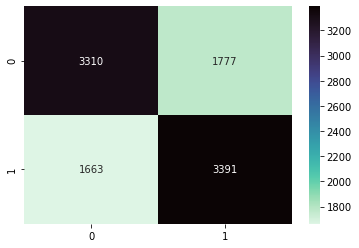

In [28]:

#Store results
y_pred_proba = grid_rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
results.loc[0, :] = [grid_rfc.score(X_test, Y_test), fpr, tpr]

# Print results
y_pred = grid_rfc.predict(X_test)
model_results(grid_rfc, y_pred)

In [ ]:
pipe2 = imbPipeline([
    ('oversample', SMOTE(random_state=0)),
    ('gbc', GradientBoostingClassifier(random_state=27))
    ])

param_grid = {'gbc__loss': ['deviance', 'exponential'],
              'gbc__learning_rate': [0.01, 0.1, 1],
              'gbc__n_estimators': [50,70,90],
              'gbc__max_depth': [5, 10, 15]}
grid_gbc = GridSearchCV(pipe2, param_grid, return_train_score=False, n_jobs=-1, cv=5, scoring='roc_auc')
grid_gbc.fit(X_train, Y_train)


In [ ]:

#Store results
y_pred_proba_gbc = grid_gbc.predict_proba(X_test)[::,1]
fpr_gbc, tpr_gbc, _gbc = metrics.roc_curve(Y_test,  y_pred_proba_gbc)
results.loc[1, :] = [grid_gbc.score(X_test, Y_test), fpr, tpr]

# Print results
y_pred_gbc = grid_gbc.predict(X_test)
model_results(grid_gbc, y_pred_gbc)